In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print data.columns.values
print data.head(10)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No        

In [31]:
print ("Missing values :  ", data.isnull().sum().values.sum())
print ("Unique values :  ",data.nunique())
data.dtypes


('Missing values :  ', 0)
('Unique values :  ', customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [32]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
# there are 11 rows 
data.dropna(inplace = True)
len(data)

7032

In [34]:
# convert yes no to binary data
mapping = {'Yes': 1, 'No': 0}
data.Churn = data.Churn.map(mapping)
data.Partner = data.Partner.map(mapping)
data.Dependents = data.Dependents.map(mapping)
data.PhoneService = data.PhoneService.map(mapping)
data.OnlineSecurity = data.OnlineSecurity.map(mapping)
data.DeviceProtection = data.DeviceProtection.map(mapping)
data.PaperlessBilling = data.PaperlessBilling.map(mapping)
data.TechSupport = data.TechSupport.map(mapping)
data.StreamingMovies = data.StreamingMovies.map(mapping)
data.StreamingTV = data.StreamingTV.map(mapping)
data.MultipleLines = data.MultipleLines.map(mapping)

print data.head(10)

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   
5  9305-CDSKC  Female              0        0           0       8   
6  1452-KIOVK    Male              0        0           1      22   
7  6713-OKOMC  Female              0        0           0      10   
8  7892-POOKP  Female              0        1           0      28   
9  6388-TABGU    Male              0        0           1      62   

   PhoneService  MultipleLines InternetService  OnlineSecurity  ...    \
0             0            NaN             DSL             0.0  ...     
1             1            0.0             DSL             1.0  ...     
2             1      

In [35]:
data.fillna(0)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0.0,DSL,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0.0,DSL,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0.0,DSL,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0.0,DSL,1.0,...,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0.0,Fiber optic,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,1.0,Fiber optic,0.0,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,0,1,22,1,1.0,Fiber optic,0.0,...,0.0,0.0,1.0,0.0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,0,0,10,0,0.0,DSL,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,0,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,1,0,28,1,1.0,Fiber optic,0.0,...,1.0,1.0,1.0,1.0,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,1,0.0,DSL,1.0,...,0.0,0.0,0.0,0.0,One year,0,Bank transfer (automatic),56.15,3487.95,0


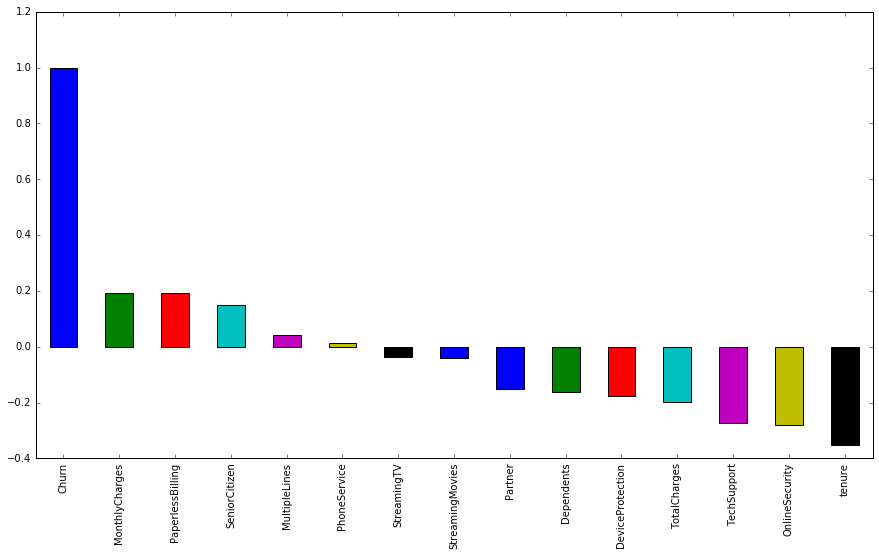

In [40]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


C:\Anaconda2\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


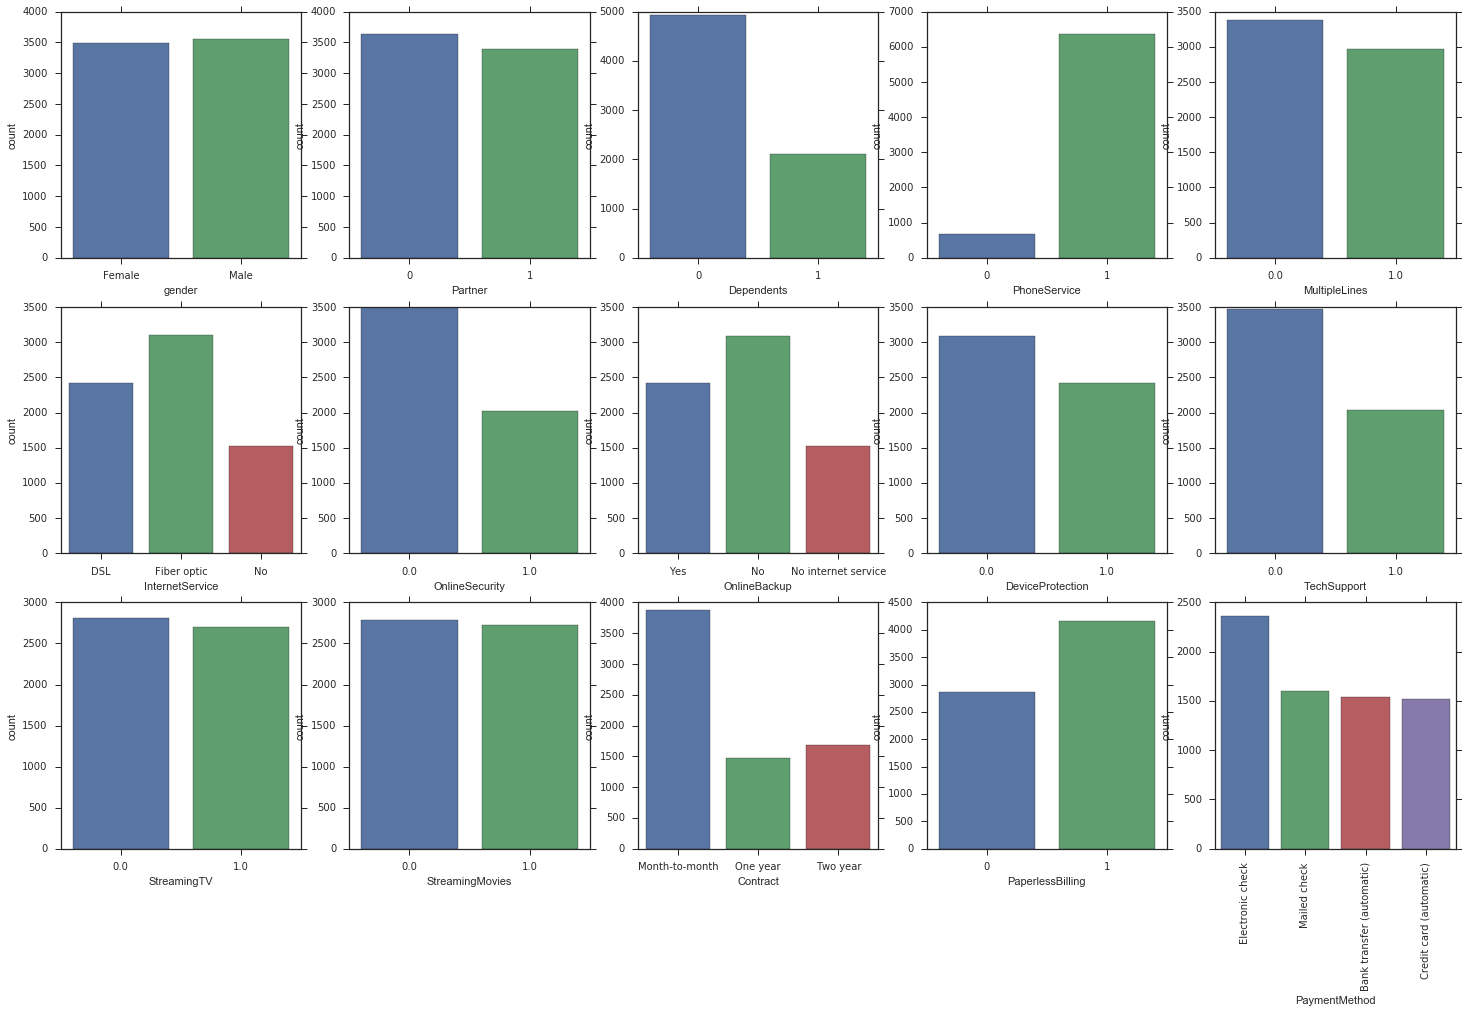

In [42]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
cust_data = data
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = cust_data, ax=axes[0][0])
sns.countplot(x = "Partner", data = cust_data, ax=axes[0][1])
sns.countplot(x = "Dependents", data = cust_data, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = cust_data, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = cust_data, ax=axes[0][4])
sns.countplot(x = "InternetService", data =cust_data, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = cust_data, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = cust_data, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = cust_data, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = cust_data, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = cust_data, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = cust_data, ax=axes[2][1])
sns.countplot(x = "Contract", data = cust_data, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = cust_data, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = cust_data, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)


In [63]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
cust_data = cust_data.apply(lambda x: object_to_int(x))
cust_data.fillna(0,inplace=True)


cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0.0,0,1.0,...,1.0,0.0,0.0,0.0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,0.0,0,1.0,...,1.0,1.0,0.0,0.0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0,1,2,70.70,151.65,1


In [64]:
X = cust_data.drop('Churn', 1)
y = cust_data['Churn']


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()]]
               

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test


In [67]:
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))


('DecisionTree :', 0.72037914691943128)
('RandomForest :', 0.77630331753554505)
('Naive Bayes :', 0.74360189573459712)
('KNeighbours :', 0.72037914691943128)
('SVM :', 0.73744075829383882)
('LogisticRegression :', 0.795260663507109)
('ExtraTreesClassifier :', 0.76729857819905212)
('AdaBoostClassifier :', 0.78388625592417061)
('GradientBoostingClassifier: ', 0.78862559241706165)
('XGB :', 0.79004739336492891)
